In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch_geometric as pyg
import torch
import pandas as pd
from torch_geometric.utils import to_undirected
import networkx as nx
from utils import dataset_gen, sublists
import seaborn as sns
from model import GNN
import os
from torch_geometric.loader import DataLoader
from IPython.display import clear_output
from utils import minmaxscaler

device = torch.device('cpu')

WSS - dataset generation for Paraview

In [20]:
index = 'WSS'
perc = 125
dataset = dataset_gen(perc,[index])
num_nodes = dataset[0].num_nodes
T = len(dataset)
loader = DataLoader(dataset, batch_size = T, shuffle=False)
y = torch.zeros((T,num_nodes))
for i, data in enumerate(loader):
    y = data.y.reshape((T,num_nodes)).detach().numpy()

save_folder = '_'.join(['export',index+'/'])
os.makedirs(save_folder, exist_ok=True)
torch.save(y, save_folder+'_'.join(['original', 'data', str(perc)]))


In [23]:
it = 0
conv_type = 'gcn'
input_size = 7 # dataset features: Time, Press_SA, Press_abd, FlowRate, coord(x), coord(y), coord(z)
hidden_size = 32
num_layers = 5
#for num_layers in list_layers:
output_size = 1
task_type = 'extrap'
param_type = 'layers'
log_name = '_'.join([conv_type,'hid', str(hidden_size),'nl',str(num_layers), 'loss'])
log_path = task_type+ '/' + '_'.join([param_type,index])

In [24]:
model = GNN(input_size,hidden_size,output_size,num_layers,conv_type=conv_type,device=device)
model.load_state_dict(torch.load(log_path+'/'+log_name + str(it)+'.pt', map_location=torch.device('cpu')))

loader = DataLoader(dataset, batch_size = T, shuffle=False)
pred = torch.zeros((T,num_nodes))

for i, data in enumerate(loader):
    pred = model(data.x, data.edge_index).reshape((T,num_nodes)).detach().numpy()

TAWSS - dataset generation for Paraview

In [38]:
dt = 1/T
data_copy = y.detach().numpy()
data_copy[0,:] = data[0,:]/2
data_copy[-1,:] = data[-1,:]/2
TAWSS = dt * np.sum(np.abs(data), axis = 0)
pred_copy = pred.detach().numpy()
pred_copy[0,:] /= 2
pred_copy[-1,:] /=2
TAWSSp = dt * np.sum(np.abs(pred), axis = 0)

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

In [25]:
exp_tawss_folder= 'export_TAWSS/'
os.makedirs(exp_tawss_folder,exist_ok=True)
torch.save(TAWSS.reshape((1,-1)), exp_tawss_folder + 'TAWSS.pt')
torch.save(TAWSSp.reshape((1,-1)), exp_tawss_folder+ 'TAWSS_pred.pt')

NameError: name 'TAWSS' is not defined

In [6]:
abs_error = np.abs(y - pred)
rel_error = np.abs(y - pred)/np.abs(y)

/var/folders/4g/4249y1xd42d75jmm55xxl99m0000gn/T/ipykernel_9172/3463704888.py:2: RuntimeWarning: divide by zero encountered in divide
  rel_error = np.abs(y - pred)/np.abs(y)


In [26]:
save_folder = '_'.join(['export',index+'/'])
os.makedirs(save_folder, exist_ok=True)
torch.save(y, save_folder+'_'.join(['original', 'data', str(perc)]))
savefile_name = [task_type, param_type, str(num_layers), str(hidden_size), str(perc)+'.pt']
torch.save(pred, save_folder+ '_'.join(['prediction'] + savefile_name) )
# torch.save(abs_error, save_folder+ '_'.join(['abs','error'] + savefile_name))
# torch.save(rel_error, save_folder+'_'.join(['rel','error'] + savefile_name))

OSI - dataset generation for Paraview

In [2]:
index = 'OSI'

it = 0
conv_type = 'gtr'
input_size = 7 # dataset features: Time, Press_SA, Press_abd, FlowRate, coord(x), coord(y), coord(z)
hidden_size = 32
num_layers = 4
#for num_layers in list_layers:
output_size = 1
task_type = 'interp'
param_type = 'layers'
log_name = '_'.join([conv_type,'hid', str(hidden_size),'nl',str(num_layers), 'loss'])
log_path = task_type+ '/' + '_'.join([param_type,index])

In [3]:
model = GNN(input_size,hidden_size,output_size,num_layers,conv_type=conv_type,device=device)
model.load_state_dict(torch.load(log_path+'/'+log_name + str(it)+'.pt', map_location=torch.device('cpu')))
perc = 75
dataset = dataset_gen(perc,[index])
num_nodes = dataset[0].num_nodes
T = len(dataset)
loader = DataLoader(dataset, batch_size = 1, shuffle=False)
pred = torch.zeros((T,num_nodes))
y = torch.zeros((T,num_nodes))
for i, data in enumerate(loader):
    y[i,:] = data.y.squeeze()
    pred[i,:] = model(data.x, data.edge_index).squeeze()

In [5]:
save_folder = '_'.join(['export',index+'/'])
os.makedirs(save_folder, exist_ok=True)
torch.save(y, save_folder+'_'.join(['original', 'data', str(perc)+'.pt']))
# savefile_name = [task_type, param_type, str(num_layers), str(hidden_size), str(perc)+'.pt']
# torch.save(pred, save_folder+ '_'.join(['prediction'] + savefile_name) )

In [24]:
num_nodes

2177

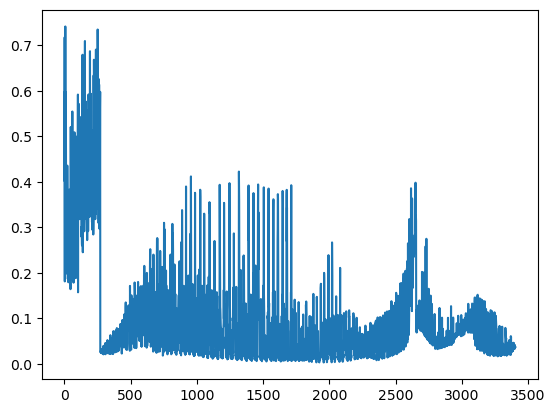

In [17]:
plt.plot([i for i in range(pred.shape[1])], pred[90,:])

In [15]:
pred_interp = torch.load('store_layers_interp_WSS/pred_WSS_3_0.pt').detach().numpy()

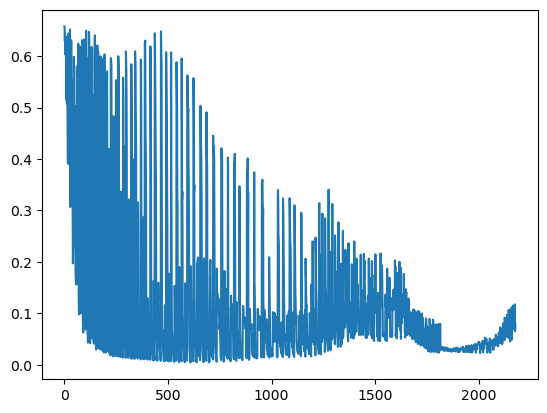

In [18]:
plt.plot([i for i in range(pred_interp.shape[1])], pred_interp[90,:])